# Task 1: Introduction

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Task 2: Dataset

Real estate agent table:

|Area|Distance|Price|
|---|---|---|
|70|3|21200|
|50|1|22010|
|120|9|24305|
|100|2|31500|

You can write the relationship with a 2-variable linear equation:

$
\begin{equation}
y = b + w_1.x_1 + w_2.x_2
\end{equation}
$

In a vector form:

$
\begin{equation}
y = b + (w_1 w_2).\binom{x_1}{x_2}
\end{equation}
$

Where
$
\begin{equation}
W = (w_1 w_2)
\end{equation}
$
and
$
\begin{equation}
X = \binom{x_1}{x_2}
\end{equation}
$

In [12]:
def generate_example(num = 1000):
    W = [1.0, -3.0] #vector value lets asssume actual value for w is this, 1 row 2 columns, making it 2 dimentional
    
    b = 1.0 #scalar value
    
    W = np.reshape(W, (2, 1)) # shape = (2,1), 2 for number of elements,w1, w2 and 1 for total w elements in its ,i.e.  number of elements in it. 2 coln 1 rows
    
    X = np.random.randn(num, 2) # 2 because we have x1 and x2, x1= Area, x2= Distance
    
    y = b + np.dot(X, W) + np.random.randn() # dot product , return 1000 values, add some noise to add some real data
    
    
    y = np.reshape(y, (num, 1)) #to make sure we explicitely set the dimentions , y will be list of 1000 numbers, we are adding a dimention here so that we dont get any error later one as we do more of matric computations
    
    
    return X, y
    


In [13]:
X, y = generate_example()

In [14]:
print(X.shape, y.shape) 
#(1000,2) (1000,1) ,i.e. 1000 examples n 2 features/independent variable 
#and 1000 examples and 1 dependent variable


(1000, 2) (1000, 1)


In [15]:
print(X[99], y[0])

[-1.20532326 -0.36443401] [1.58045968]


# Task 3: Initialize Parameters

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

The objective of the gradient descent algorithm is to minimize this loss value.

Gradient Descent Objective is to 
$
\begin{equation}
min(J)
\end{equation}
$

In [16]:
class Model:
    def __init__(self, num_features):
        self.num_features = num_features
        self.W = np.random.randn(num_features, 1)
        self.b = np.random.randn()
        

In [17]:
model = Model(2)
print(model.W)
print(model.b)

[[-0.05828935]
 [ 0.08746248]]
-1.3758653757662547


# Task 4: Forward Pass

The gradient descent algorithm can be simplified in 4 steps:

1. Get predictions y_hat for X with current values of W and b.
2. Compute the loss between y and y_hat
3. Find gradients of the loss with respect to parameters W and b
4. Update the values of W and b by subtracting the gradient values obtained in the previous step

Let's simplify our linear equation a bit more for an example:
$
\begin{equation}
y = wx
\end{equation}
$

Let's plot J as a function of w

![Loss vs Param](JvsW.png)

The gradients of loss with respect to w:

\begin{equation}
\frac{dJ}{dw} = \frac{\delta{J}}{\delta{w}} = \lim_{\epsilon \to 0} \frac{J(w + \epsilon) - J(w)}{\epsilon}
\end{equation}

In [18]:
class Model(Model):
    def forward_pass(self, X):
        y_hat = self.b + np.dot(X, self.W)
        return y_hat
        

In [23]:
y_hat = Model(2).forward_pass(X) # 2 features , area and distance
print(y_hat.shape[0], y_hat[0])

1000 [0.9267226]


# Task 5: Compute Loss

The loss over **m** examples:

$
\begin{equation}
J = \frac{1}{2m} \sum_{i=1}^{m} (y - \hat{y})^2
\end{equation}
$

In [36]:
class Model(Model):
    def compute_loss(self, y_hat, y_true):
        return  np.sum(np.square(y_hat - y_true))/(2*y_hat.shape[0]) # y_hat.shape[0] is 1000

In [37]:
model = Model(2)
y_hat = model.forward_pass(X)  # return predction
loss = model.compute_loss(y_hat, y)

In [38]:
loss

7.4322017765225175

# Task 6: Backward Pass

The gradient of loss with respect to bias can be calculated with:

$
\begin{equation}
\frac{dJ}{db} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)})
\end{equation}
$

$
\begin{equation}
\frac{dJ}{dW_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y^{(i)}} - y^{(i)}).x_j^{(i)}
\end{equation}
$

In [41]:
class Model(Model):
    def backward_pass(self, X, y_true, y_hat):
        m = y_true.shape[0]
        db = (1/m) * np.sum(y_hat - y_true)
        dw = (1/m) * np.sum(np.dot(np.transpose(y_hat - y_true), X), axis = 0)
        return dw, db
        

In [43]:
model = Model(2)
x, y = generate_example()
y_hat = model.forward_pass(X)
dw,db = model.backward_pass(X, y, y_hat)

In [44]:
print(dw, db)

[0.69264906 0.52019447] -2.8254536853922665


# Task 7: Update Parameters

In [46]:
class Model(Model):
    def update_params(self, dw, db, lr): # learning rate
        self.W = self.W - lr * np.reshape(dw, (self.num_features, 1)) # should hv same shape as W
        self.b = self.b - db # nothing to do with shape as its scalar value
        

# Task 8: Training Loop

In [47]:
class Model(Model):
    def train(self, x_train, y_train, iterations, lr):
        losses = []
        for i in range(0, iterations):
            y_hat = self.forward_pass(x_train)
            loss = self.compute_loss(y_hat, y_train)
            dw, db = self.backward_pass(x_train, y_train, y_hat)
            self.update_params(dw, db, lr)
            losses.append(loss)
            if i%int(iterations/10) == 0:
                print('Iter: {}, Loss: {:.4f}'.format(i, loss))
        return losses

model = Model(2)

In [48]:
model = Model(2)

In [51]:
x_train, y_train = generate_example()

In [54]:
losses = model.train(x_train, y_train, 1000, 3e-3)

Iter: 0, Loss: 0.0103
Iter: 100, Loss: 0.0055
Iter: 200, Loss: 0.0030
Iter: 300, Loss: 0.0016
Iter: 400, Loss: 0.0009
Iter: 500, Loss: 0.0005
Iter: 600, Loss: 0.0002
Iter: 700, Loss: 0.0001
Iter: 800, Loss: 0.0001
Iter: 900, Loss: 0.0000


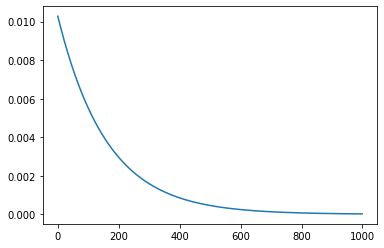

In [55]:
plt.plot(losses)

# Task 9: Predictions

In [70]:
model_untrain = Model(2)
x_test, y_test = generate_example(500)
print(x_test.shape, y_test.shape)


(500, 2) (500, 1)


In [71]:
preds_untrained = model_untrain.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)

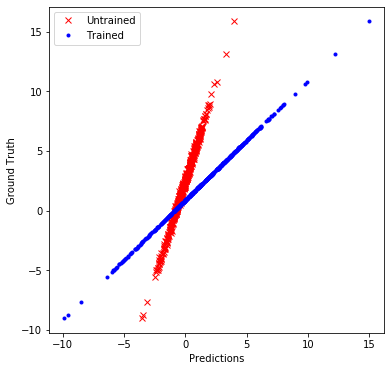

In [72]:
plt.figure(figsize =(6,6))
plt.plot(preds_untrained, y_test, 'rx', label = 'Untrained')
plt.plot(preds_trained, y_test, 'b.', label = 'Trained')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.show()